In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Stores.csv')

In [3]:
df.head()


Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [5]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [6]:
df.shape

(896, 5)

In [7]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [8]:
df.drop(columns='Store ID ',inplace=True)

In [9]:
df.head()

Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0        1659             1961                   530        66490
1        1461             1752                   210        39820
2        1340             1609                   720        54010
3        1451             1748                   620        53730
4        1770             2111                   450        46620

In [12]:
df.describe()

Store_Area  Items_Available  Daily_Customer_Count    Store_Sales
count   896.000000       896.000000            896.000000     896.000000
mean   1485.409598      1782.035714            786.350446   59351.305804
std     250.237011       299.872053            265.389281   17190.741895
min     775.000000       932.000000             10.000000   14920.000000
25%    1316.750000      1575.500000            600.000000   46530.000000
50%    1477.000000      1773.500000            780.000000   58605.000000
75%    1653.500000      1982.750000            970.000000   71872.500000
max    2229.000000      2667.000000           1560.000000  116320.000000

In [10]:
for i in df.columns:
    print(i)
    print('Skewness: ',df[i].skew())

Store_Area
Skewness:  0.030366862979232103
Items_Available
Skewness:  0.03443939172681748
Daily_Customer_Count
Skewness:  0.07463278790524851
Store_Sales
Skewness:  0.14879364291055253


In [11]:
df.corr()

Store_Area  Items_Available  Daily_Customer_Count  \
Store_Area              1.000000         0.998891             -0.041423   
Items_Available         0.998891         1.000000             -0.040978   
Daily_Customer_Count   -0.041423        -0.040978              1.000000   
Store_Sales             0.097474         0.098849              0.008629   

                      Store_Sales  
Store_Area               0.097474  
Items_Available          0.098849  
Daily_Customer_Count     0.008629  
Store_Sales              1.000000

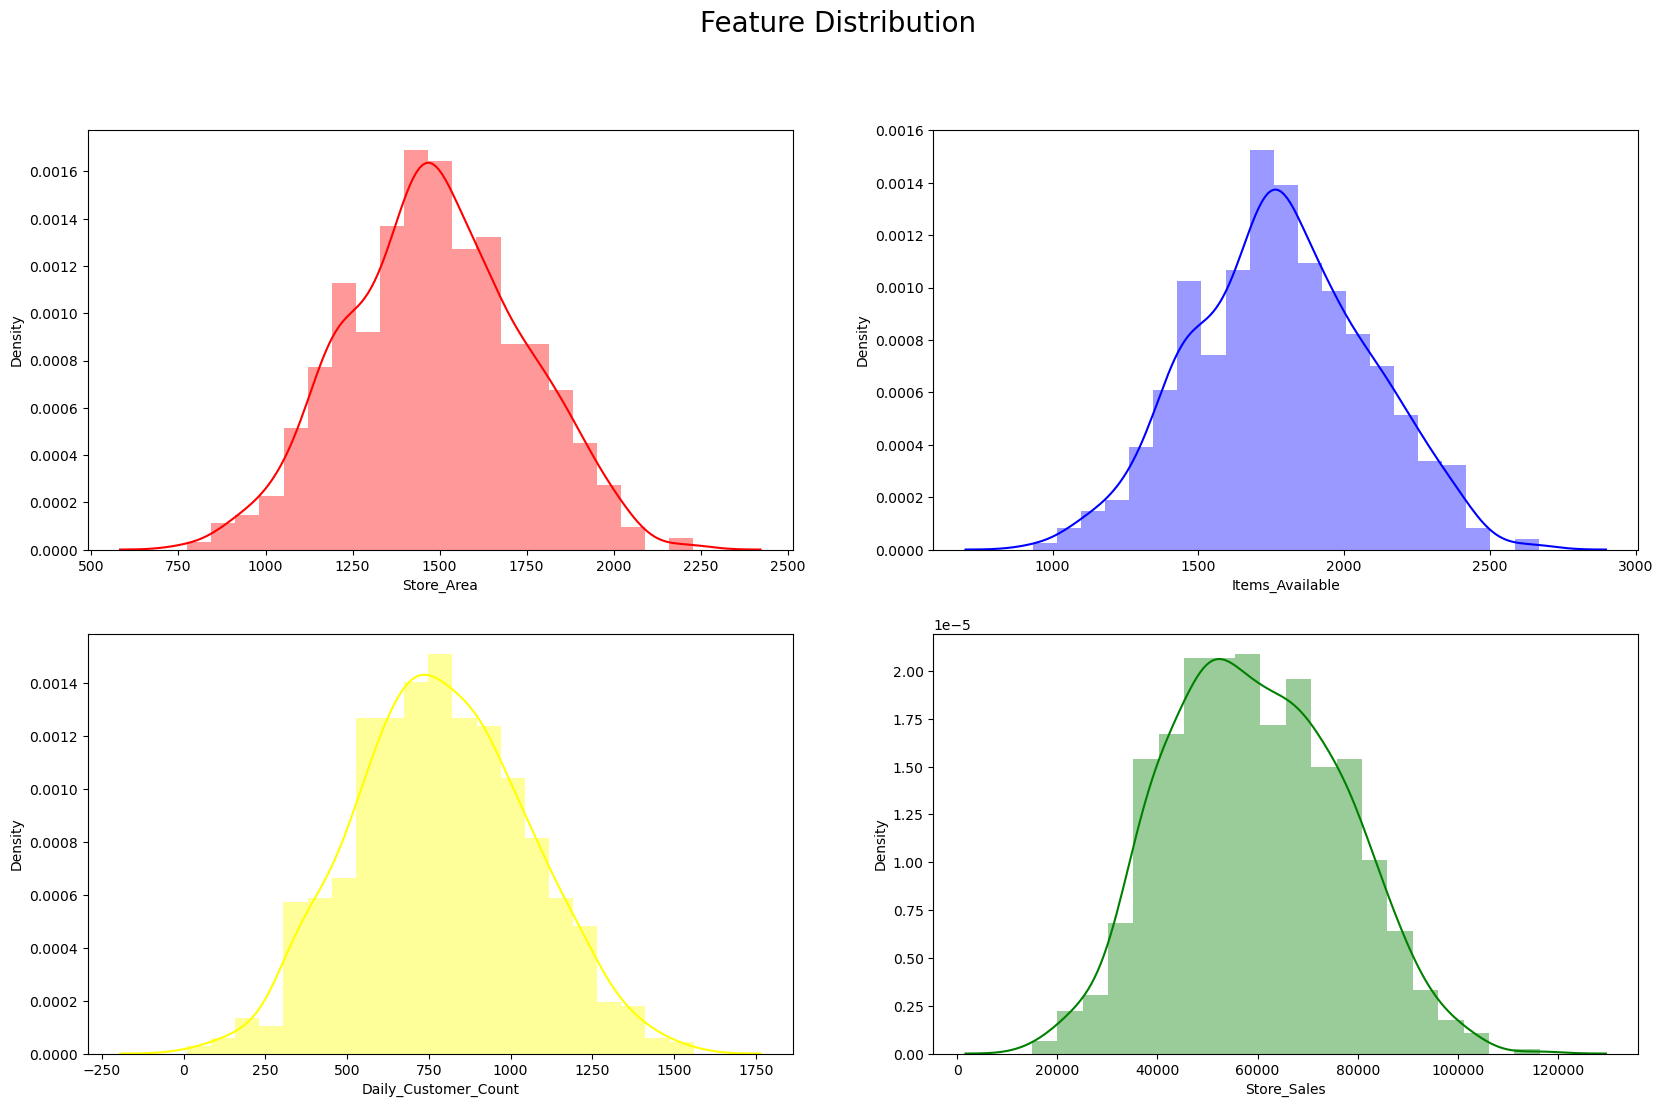

In [13]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.distplot(df.Store_Area,color='red')
plt.subplot(2,2,2)
sns.distplot(df.Items_Available,color='b')
plt.subplot(2,2,3)
sns.distplot(df.Daily_Customer_Count,color='yellow')
plt.subplot(2,2,4)
sns.distplot(df.Store_Sales,color='green')
plt.suptitle('Feature Distribution',fontsize=20)
plt.show()

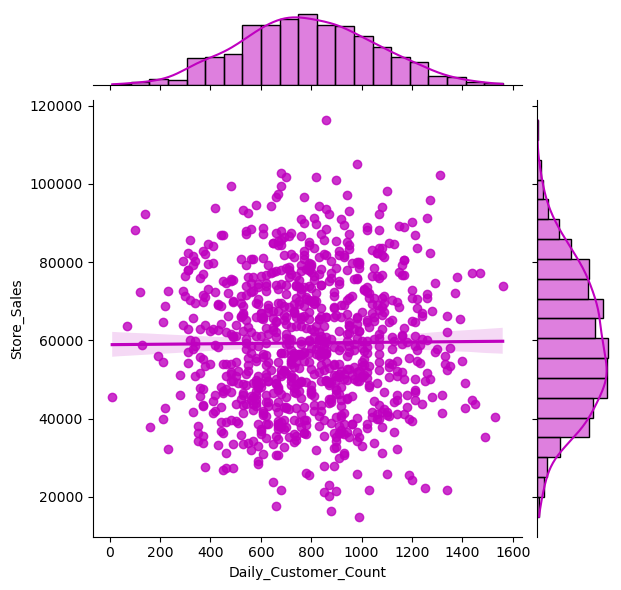

In [15]:
sns.jointplot(x='Daily_Customer_Count', y='Store_Sales', data=df, kind='reg', color='m')
plt.show()


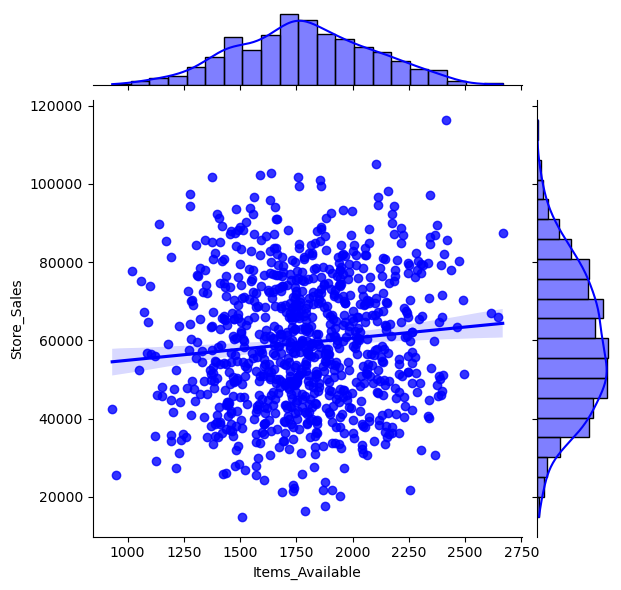

In [17]:
sns.jointplot(x='Items_Available', y='Store_Sales', data=df, kind='reg', color='blue')
plt.show()


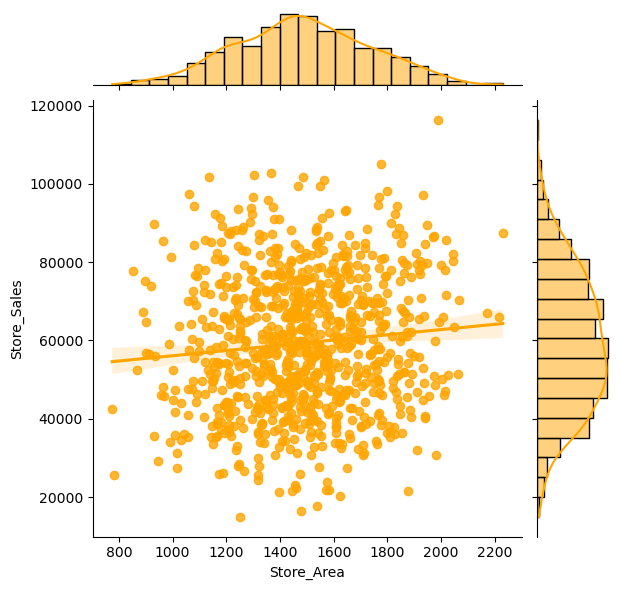

In [18]:
sns.jointplot(x='Store_Area',y='Store_Sales',data=df,kind='reg',color='orange')
plt.show()

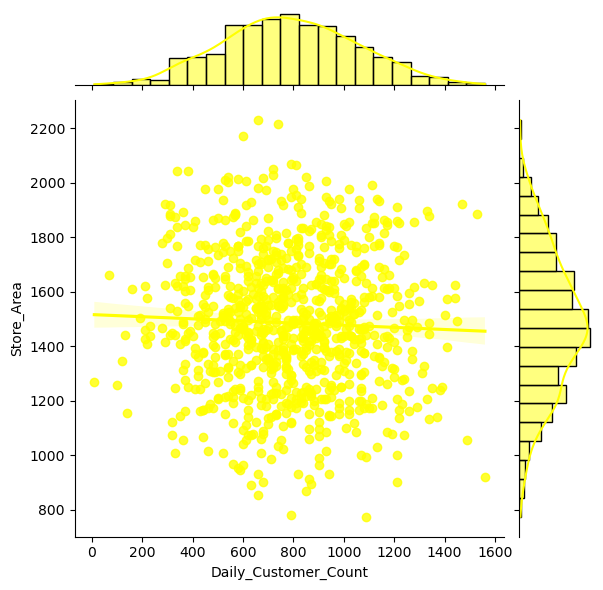

In [19]:
sns.jointplot(x='Daily_Customer_Count',y='Store_Area',data=df,kind='reg',color='yellow')
plt.show()

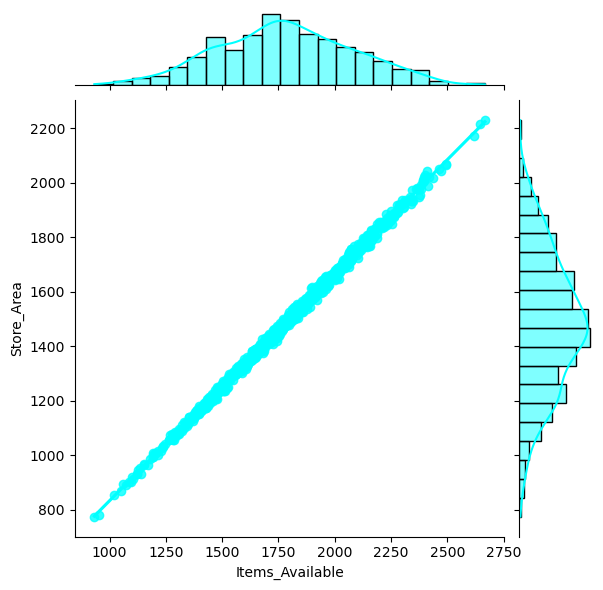

In [20]:
sns.jointplot(x='Items_Available',y='Store_Area',data=df,kind='reg',color='cyan')
plt.show()

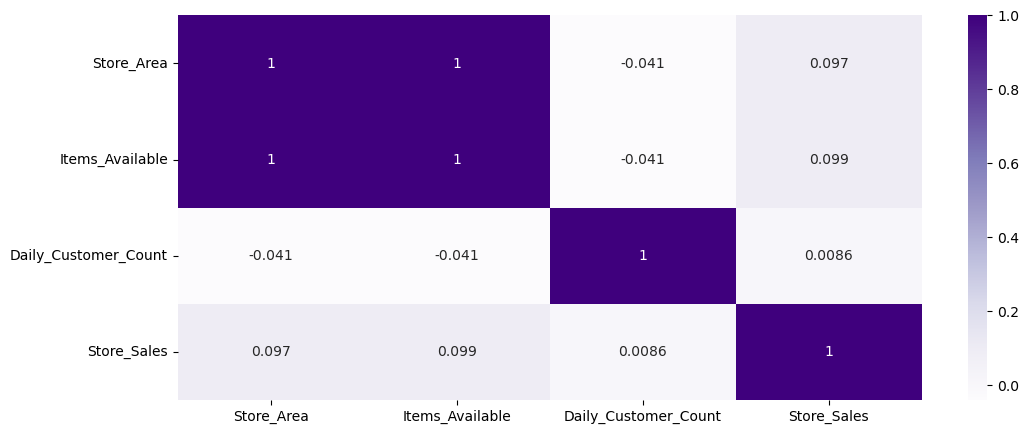

In [21]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='Purples')
plt.show()

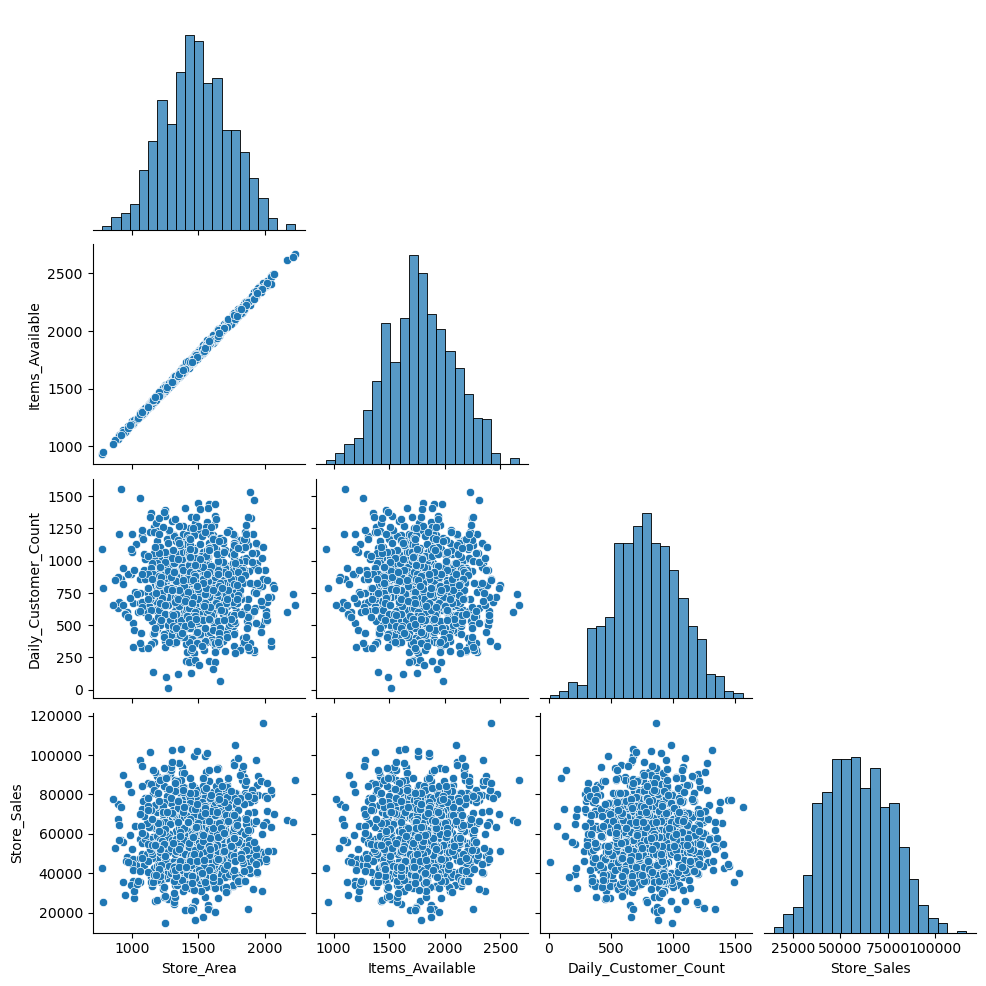

In [22]:
sns.pairplot(df,corner=True)
plt.show()

In [23]:
px.scatter(df,df.Store_Area,df.Store_Sales,color='Store_Sales',size='Store_Sales',template='plotly_dark',title='Store_Area Vs Store_Sales')


In [24]:
px.scatter(df,df.Items_Available,df.Store_Sales,color='Store_Sales',size='Items_Available',template='plotly_dark',color_continuous_scale=px.colors.sequential.Plotly3,title='Items_Available Vs Store_Sales')

In [25]:
px.scatter(df,df.Daily_Customer_Count,df.Store_Sales,color='Store_Sales',size='Daily_Customer_Count',template='plotly_dark',color_continuous_scale=px.colors.sequential.Plasma,title='Daily_Customer_Count Vs Store_Sales')

In [26]:
px.scatter(df,x='Items_Available',y='Store_Area',template='plotly_dark',color_discrete_sequence=['lightgreen'],trendline='ols',title='Items_Available Vs Store_Area')

In [27]:
x=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [29]:
x_train_bk=x_train.copy()
x_test_bk=x_test.copy()

In [31]:
cols=['Store_Area', 'Items_Available', 'Daily_Customer_Count']


In [32]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [33]:
x_train_bk.corr()

Store_Area  Items_Available  Daily_Customer_Count
Store_Area              1.000000         0.998943             -0.026917
Items_Available         0.998943         1.000000             -0.028101
Daily_Customer_Count   -0.026917        -0.028101              1.000000

In [34]:
x_train.corr()

Store_Area  Items_Available  Daily_Customer_Count
Store_Area              1.000000         0.998943             -0.026917
Items_Available         0.998943         1.000000             -0.028101
Daily_Customer_Count   -0.026917        -0.028101              1.000000

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=model.predict(x_test)

In [38]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 14082.927
Mean Squared Error (MSE): 293534475.158
Root Mean Squared Error (RMSE): 17132.848
R2_score: 0.015729
Root Mean Squared Log Error (RMSLE): 9.749
Mean Absolute Percentage Error (MAPE): 27.866 %
Adj R Square:  0.012419


In [39]:
Results = pd.DataFrame({'Store_Sales_A':y_test, 'Store_Sales_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = df.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
846        1535             1819                   540        59290   
587        1553             1831                   740        35680   
837        1916             2277                   610        55880   
810         994             1194                  1090        81390   
449        1685             2015                  1160        79220   
890        1549             1851                  1220        70620   
859        1458             1757                   850        58600   
528        1700             2064                   940        70310   
380        1599             1946                   940        78090   
446        1179             1428                  1290        74570   

     Store_Sales_A  Store_Sales_P  
846          59290   60044.899208  
587          35680   60155.727793  
837          55880   62420.209524  
810          81390   56903.333925  
449          79220   61160.375959  
890          70620   60326.955634  
859          58600   59754.202280  
528          70310   61338.214651  
380          78090   60726.239102  
446          74570   58137.003711

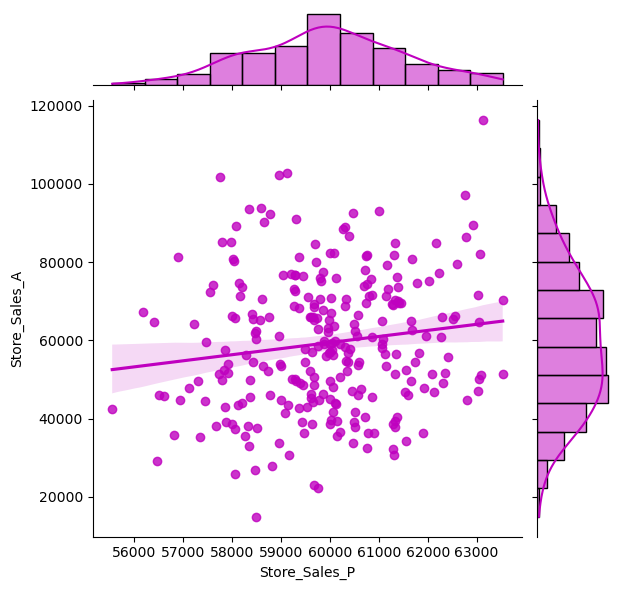

In [41]:
sns.jointplot(x='Store_Sales_P', y='Store_Sales_A', data=Results, kind='reg', color='m')
plt.show()


In [42]:
px.scatter(Results,'Store_Sales_P','Store_Sales_A',trendline='ols',trendline_color_override='blue',template='plotly_dark',title='Predicted Vs Actual Sales')